# Normalization

The formula for Normalization is given below:

$$
x_{norm} = {x - x_{min} \over x_{max} - x_{min}}
$$

We subtract the minimum value from each entry and then divide the result by the range. Where range is the difference between the maximum value and the minimum value.

In [74]:
%pip install numpy matplotlib soundfile sox pyloudnorm

Note: you may need to restart the kernel to use updated packages.


In [75]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import sox
import os
import pyloudnorm as pyln
from pathlib import Path

# Set the global style
plt.style.use('ggplot')

# Set global parameters for legend text color, facecolor, and edgecolor
plt.rcParams['legend.labelcolor'] = 'black'
plt.rcParams['legend.facecolor'] = 'white'  # Set to match the background color
plt.rcParams['legend.edgecolor'] = 'black'  # Set to match the color of axis labels

## Numpy: normalize an array

In [76]:
# Initialize the input array
x_array = np.array([0, 0.9, 2.3, 3, 3.9])

# Normalize the array to the range [0, 1]
x_norm = (x_array - np.min(x_array)) / (np.max(x_array) - np.min(x_array))

# Print the normalized array
print(x_norm)

[0.         0.23076923 0.58974359 0.76923077 1.        ]


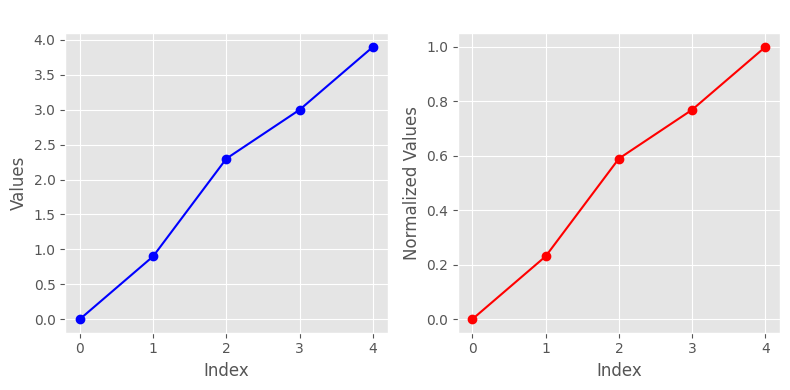

In [77]:
# Plot the original data
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(x_array, marker='o', linestyle='-', color='b')
plt.title('Original Data')
plt.xlabel('Index')
plt.ylabel('Values')

# Plot the normalized data
plt.subplot(1, 2, 2)
plt.plot(x_norm.flatten(), marker='o', linestyle='-', color='r')
plt.title('Normalized Data (0 to 1)')
plt.xlabel('Index')
plt.ylabel('Normalized Values')

plt.tight_layout()
plt.show()

## Numpy: normalize an audio signal

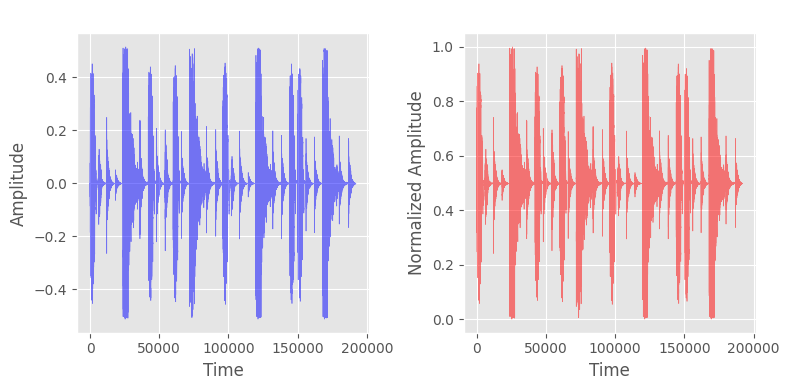

In [78]:
# Load an example audio file
audio_signal, sample_rate = sf.read('../data/audio/drm-80s.wav')

# Plot the original audio signal
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(audio_signal, color='b', alpha=0.5, linewidth=0.5)
plt.title('Original Audio Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Normalize the audio signal to the range [0, 1]
normalized_signal = (audio_signal - np.min(audio_signal)) / (np.max(audio_signal) - np.min(audio_signal))

# Plot the normalized audio signal
plt.subplot(1, 2, 2)
plt.plot(normalized_signal, color='r', alpha=0.5, linewidth=0.5)
plt.title('Normalized Audio Signal (0 to 1)')
plt.xlabel('Time')
plt.ylabel('Normalized Amplitude')

plt.tight_layout()
plt.show()

## Sox: contrast effect

The [`pysox`](https://pysox.readthedocs.io/en/latest/index.html) documentation is very limited on the contrast effect, but it seems to be similar to compression: this effect modifies an audio signal to make it sound louder.



output_file: ../audio/processed/drm-80s-contr.wav already exists and will be overwritten on build


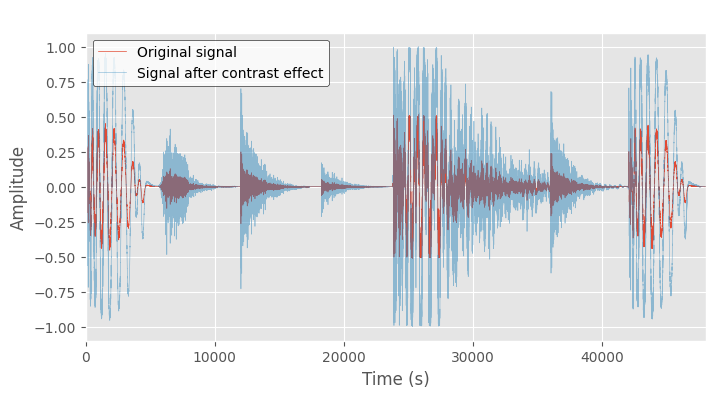

input signal mean: -0.000065
output signal mean: 0.001080
output signal normalized mean: 0.001510


In [79]:
# Create a SoX transformer
tfm = sox.Transformer()
tfm.contrast(amount=100)

destination_dir = '../audio/processed'

if not os.path.exists(destination_dir):
    os.makedirs(destination_dir, exist_ok=True)

# Apply the effect and specify both input and output file paths
in_file = '../data/audio/drm-80s.wav'
out_contr_file = '../audio/processed/drm-80s-contr.wav'

tfm.build_file(input_filepath=in_file, output_filepath=out_contr_file)

# Load the original and processed audio signals
input_signal, sample_rate = sf.read(in_file)
output_signal, sample_rate = sf.read(out_contr_file)


# output_signal_dc = output_signal - output_signal.mean()

output_signal_norm = output_signal / np.max(np.abs(output_signal))

zoom_factor = 1

# Plot the original, processed, and normalized signals in one plot
plt.figure(figsize=(8, 4))
plt.plot(input_signal, label="Original signal", alpha=1.0, linewidth=0.5)
plt.plot(output_signal_norm, label="Signal after contrast effect", alpha=0.5, linewidth=0.5)
plt.title("Audio Signal Comparison")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.ylim(-1.1, 1.1)
plt.xlim(0, sample_rate*zoom_factor)
plt.legend()
plt.grid(True)
plt.show()

print(f'input signal mean: {input_signal.mean():.6f}')
print(f'output signal mean: {output_signal.mean():.6f}')
print(f'output signal normalized mean: {output_signal_norm.mean():.6f}')

# Pyloudnorm: Loudness Normalization

In [80]:
# Load the audio file with soundfile
input_signal, sample_rate = sf.read(in_file)

# Measure the loudness of the input signal
meter = pyln.Meter(sample_rate)
loudness = meter.integrated_loudness(input_signal)
print(f'input loudness {loudness:.6f}')

input loudness -20.219252


In [81]:
out_loudnorm_file = '../audio/processed/drm-80s-loudnorm.wav'

# loudness normalize audio with target loudness of -12 LUFS
loudness_normalized_audio = pyln.normalize.loudness(input_signal, loudness, -23.0)

# write the output file
sf.write(out_loudnorm_file, loudness_normalized_audio, sample_rate, 'PCM_24')

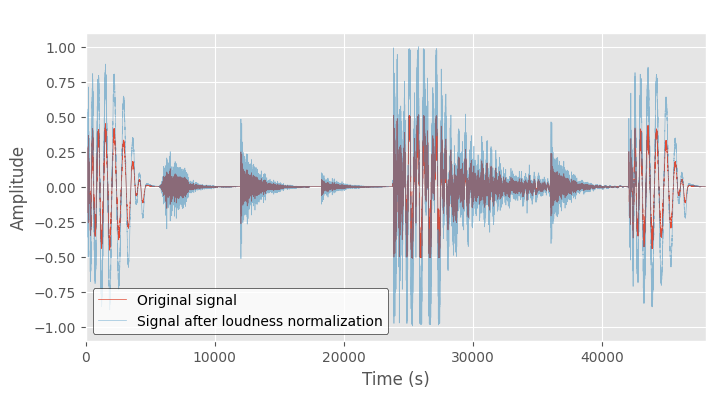

In [82]:
# Load the original and processed audio signals
input_signal, sample_rate = sf.read(in_file)
output_signal, sample_rate = sf.read(out_loudnorm_file)

output_signal_norm = output_signal / np.max(np.abs(output_signal))

zoom_factor = 1

# Plot the original, processed, and normalized signals in one plot
plt.figure(figsize=(8, 4))
plt.plot(input_signal, label="Original signal", alpha=1.0, linewidth=0.5)
plt.plot(output_signal_norm, label="Signal after loudness normalization", alpha=0.5, linewidth=0.5)
plt.title("Audio Signal Comparison")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.ylim(-1.1, 1.1)
plt.xlim(0, sample_rate*zoom_factor)
plt.legend()
plt.grid(True)
plt.show()